### Выполнила: Шадынина Анастасия, ПИ20-4 
### Тема: Леса деревьев решений в задачах классификации (предметная область - маркетинг)
### Исходные данные: https://archive.ics.uci.edu/ml/datasets/bank+marketing

#### Цель работы

С помощью датасета Bank Marketing Data Set решить задачу классификации. Задача классификации - это определить, будет ли клиент банка подписываться на новый продукт (депозит) или нет, основываясь на информации о клиенте, такой как возраст, образование, семейный статус, работа и т.д. При этом необходимо использовать DecisionTreeClassifier, чтобы проверить насколько эффективна данная модель при решении подобных задач.

Столбцы в наборе данных Bank Marketing Data Set описывают следующие переменные:

1. age - возраст клиента 
2. job - тип работы клиента 
3. marital - семейное положение клиента 
4. education - уровень образования клиента 
5. default - имеет ли клиент дефолтный кредит 
6. housing - имеет ли клиента кредит на жилье
7. loan - имеет ли клиента персональный заем 
8. contact - тип клиента 
9. day_of_week - день месяца, когда клиент был последний раз связан 
10. month - месяц, когда клиент был последний раз связан 
11. duration - длительность последнего звонка с клиентом 
12. campaign - количество клиентов, выполненных в рамках этой кампании 
13. pdays - количество дней, прошедших после того, как клиент был последний раз связан 
14. previous - количество клиентов, выполненных до этой кампании и для этого контакта 
15. poutcome - результат предыдущей маркетинговой кампании 
16. Emp.var.rate - коэффициент изменения занятости - квартальный показатель
17. Cons.price.idx - индекс потребительских цен - месячный индикатор 
18. Cons.conf.idx - индекс потребительского доверия - месячный индикатор
19. Euribor3m - ежедневный индикатор
20. Nr.employed - количество работников - квартальный показатель 
21. y - подписал ли клиент новый депозит

### Импортирование всех библиотек, которые необходимы для дальнейшей работы: 

In [1]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd 
import os

from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras 


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#### Изучение исходных данных и их предварительный анализ

Считываем данные

In [2]:
df_bank = pd.read_csv('./data/bank-additional-full.csv', sep = ';')
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Размерность датасета; 41188 - строки, 21 столбцы

In [5]:
df_bank.shape

(41188, 21)

Показывает краткую сводку DataFrame'а. Здесь можно увидеть название каждого столбца, ненулевые значене, тип столбцов и используемая память.

In [3]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Проверяем, что не содержится пустых значений в наборе данных.

In [4]:
df_bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Выводим уникальные занчения каждого столбца, чей тип равен 'object' (т.е строка)

In [21]:
for col in df_bank.columns:
    if df_bank[col].dtype == 'object':
        print('-'*20)
        print(f'Имя столбца: {col} \nУникальные значение: {df_bank[col].unique()}')

--------------------
Имя столбца: job 
Уникальные значение: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
--------------------
Имя столбца: marital 
Уникальные значение: ['married' 'single' 'divorced' 'unknown']
--------------------
Имя столбца: education 
Уникальные значение: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
--------------------
Имя столбца: default 
Уникальные значение: ['no' 'unknown' 'yes']
--------------------
Имя столбца: housing 
Уникальные значение: ['no' 'yes' 'unknown']
--------------------
Имя столбца: loan 
Уникальные значение: ['no' 'yes' 'unknown']
--------------------
Имя столбца: contact 
Уникальные значение: ['telephone' 'cellular']
--------------------
Имя столбца: month 
Уникальные значение: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
--------------------
Имя столбца

Просмотрим  числовые столбцы и проверим уникальные значения и их количество.

In [4]:
for col in df_bank.columns:
    if df_bank[col].dtype == 'int64' or df_bank[col].dtype == 'float64':
        print('-'*20)
        print(f'Имя столбца: {col} \nУникальные значение: {df_bank[col].unique()} {(len(df_bank[col].unique()))} ')

--------------------
Имя столбца: age 
Уникальные значение: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89] 78 
--------------------
Имя столбца: duration 
Уникальные значение: [ 261  149  226 ... 1246 1556 1868] 1544 
--------------------
Имя столбца: campaign 
Уникальные значение: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43] 42 
--------------------
Имя столбца: pdays 
Уникальные значение: [999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20] 27 
--------------------
Имя столбца: previous 
Уникальные значение: [0 1 2 3 4 5 6 7] 8 
--------------------
Имя столбца: emp.var.rate 
Уникальные значение: [ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1] 10 
----

Вывод: Достаточно немного уникальных значений, которые находятся в одинаковом числовом диапозоне, что позволит исключить преобразования столбцов. Однако в столбце 'pdays' есть аномальное число 999, которое может помешать дальнейшему анализу.

Получение описательной статистики

In [5]:
df_bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Вывод: В данных нет пустых значений, достаточно много категориальных столбцов, что в дальнейшем упростит преобразование данные в числовые. 

###  Визаулизация и анализ

Функция для отображение графика: количество наблюдений в каждом интервале.
В данном случае, столбец "age", который показывает возраст клиентов.

In [24]:
def show_age(data: pd.DataFrame):
    fig, ax = plt.subplots()
    fig.set_size_inches(20, 8)
    sns.countplot(x = 'age', data = data)
    ax.set_xlabel('Возраст', fontsize=15)
    ax.set_ylabel('Количество', fontsize=15)
    ax.set_title('Возраст-Количество', fontsize=15)
    sns.despine()

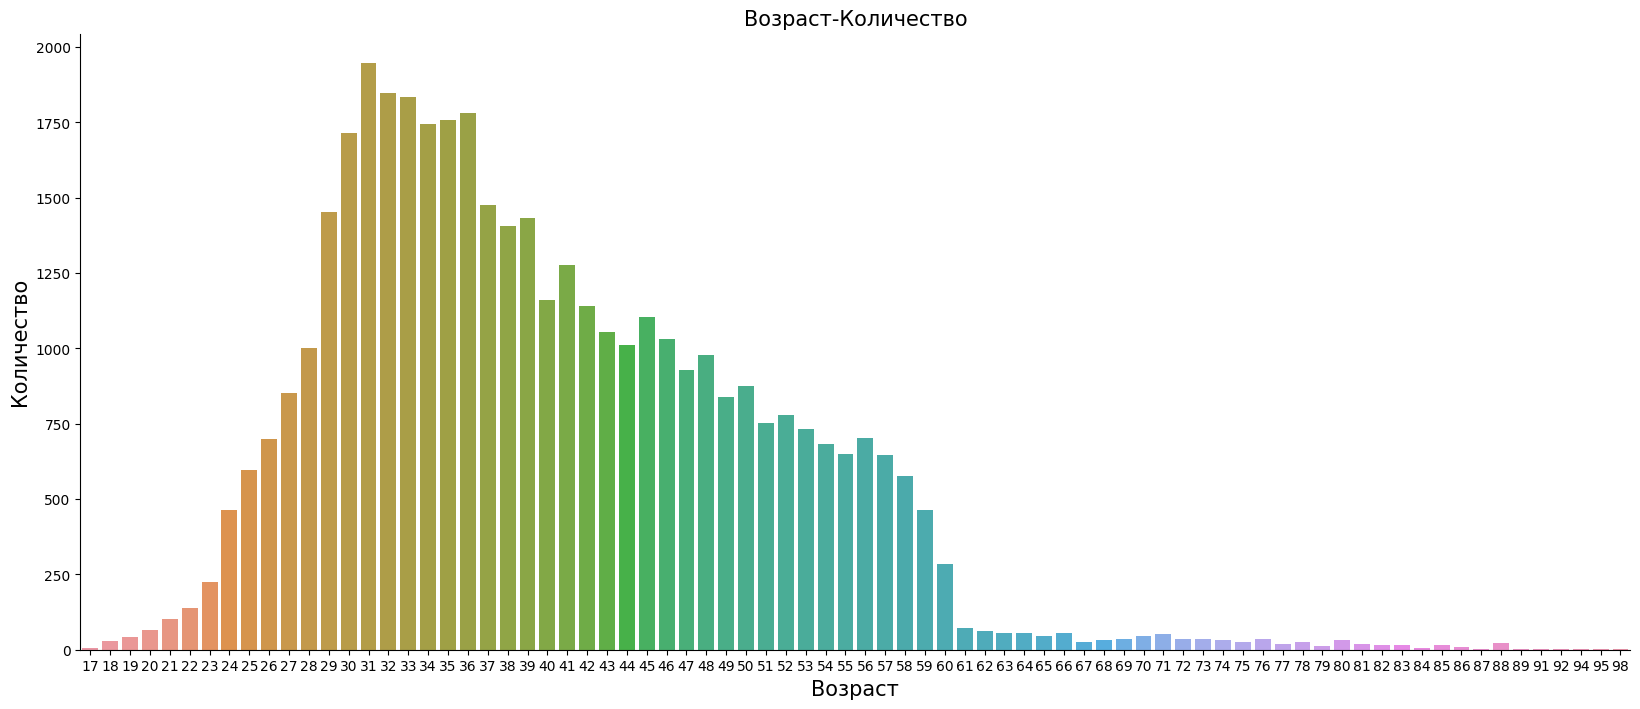

In [25]:
show_age(df_bank)

Отображаем график ящик с усами, чтобы посмотреть на выбросы в столбце 'age'.

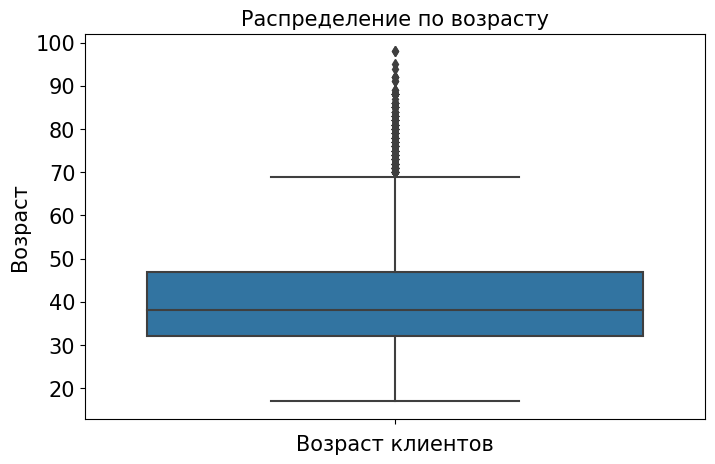

In [21]:
fig,ax = plt.subplots(figsize = (8, 5))
sns.boxplot(y = 'age', data = df_bank, orient = 'v', ax = ax)
ax.set_xlabel('Возраст клиентов', fontsize=15)
ax.set_ylabel('Возраст', fontsize=15)
ax.set_title('Распределение по возрасту', fontsize=15)
ax.tick_params(labelsize=15)

Функция для вычисления квартилелей и верхней границы графика. Подобный анализ необходим, чтобы исключить аномальные значения, выявить закономерности. 

In [12]:
def boxplot_analysis(df: pd.DataFrame, column_name: str):
    print('1-ый квартиль: ', df[column_name].quantile(q = 0.25))
    print('2-ой квартиль: ', df[column_name].quantile(q = 0.50))
    print('3-ий квартиль: ', df[column_name].quantile(q = 0.75))
    print('4-ый квартиль: ', df[column_name].quantile(q = 1.00))
    IQR = df[column_name].quantile(q = 0.75) - df[column_name].quantile(q = 0.25)
    above = df[column_name].quantile(q = 0.75) + 1.5*(IQR)
    print('Верхняя граница: ', above)
    print('Количество выбросов: ', df[df[column_name] > above][column_name].count())
    print('Число клиентов: ', len(df))

    print('Процентное соотношение - количество выбросов/количество клиентов:',
     round(df[df[column_name] > above][column_name].count()*100/len(df),4),'%')



In [54]:
boxplot_analysis(df= df_bank, column_name='age')

1-ый квартиль:  32.0
2-ой квартиль:  38.0
3-ий квартиль:  47.0
4-ый квартиль:  98.0
Верхняя граница:  69.5
Количество выбросов:  469
Число клиентов:  41188
Процентное соотношение - количество выбросов/количество клиентов: 1.1387 %


Вывод: Нельзя сказать, что возраст оказывает сильное влияение на целевую пременную, но стоит отметить, что в датасете представлены люди всех возрастов.

Столбец 'duration' отвечает за продолжительность последнего контакта в секундах. Визуально видно, как сильно отличается график от предыдущего. 

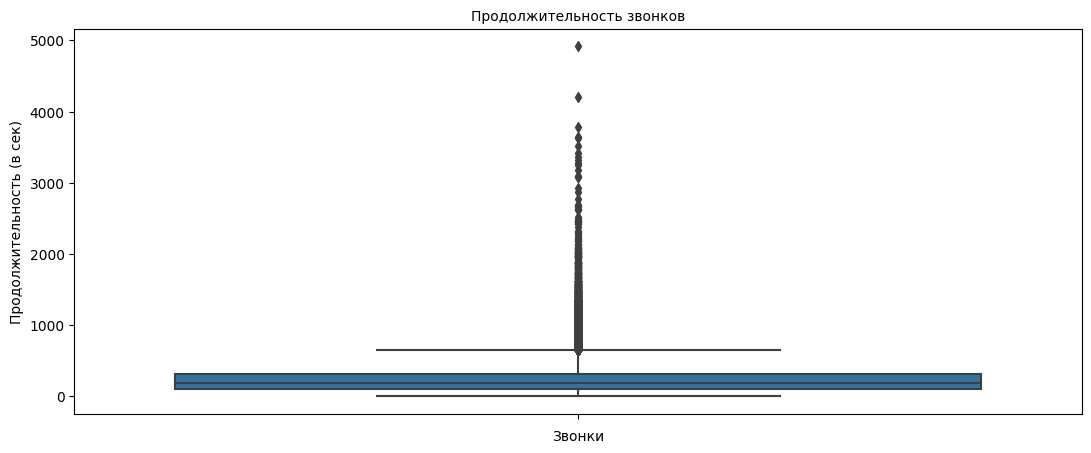

In [10]:
fig, ax = plt.subplots( figsize = (13, 5))
sns.boxplot(y = 'duration', data = df_bank, orient = 'v', ax = ax)
ax.set_xlabel('Звонки', fontsize=10)
ax.set_ylabel('Продолжительность (в сек)', fontsize=10)
ax.set_title('Продолжительность звонков', fontsize=10)
ax.tick_params(labelsize=10)

In [13]:
boxplot_analysis(df= df_bank, column_name='duration')

1-ый квартиль:  102.0
2-ой квартиль:  180.0
3-ий квартиль:  319.0
4-ый квартиль:  4918.0
Верхняя граница:  644.5
Количество выбросов:  2963
Число клиентов:  41188
Процентное соотношение - количество выбросов/количество клиентов: 7.1938 %


Вывод: разнообразие данных и обширное количество выборосов заставляет задуматься о том, чтобы или удалить столбец, или изменить данные таким образом, чтобы минимизировать выбросы

Функция, отображающая количество значений по разным столбцам. 

In [5]:
def show_countplot(data: pd.DataFrame, column_name: str, set_xl: str, set_titl:str):
    fig, ax = plt.subplots()
    fig.set_size_inches(20, 8)
    sns.countplot(x = column_name, data = data)
    ax.set_xlabel(set_xl, fontsize=15)
    ax.set_ylabel('Количество', fontsize=15)
    ax.set_title(set_titl, fontsize=15)
    ax.tick_params(labelsize=15)


Отображаем сколько значений в столбце 'marital'. Наблюдаем, что значение 'unknown' чрезвычайно мало. 

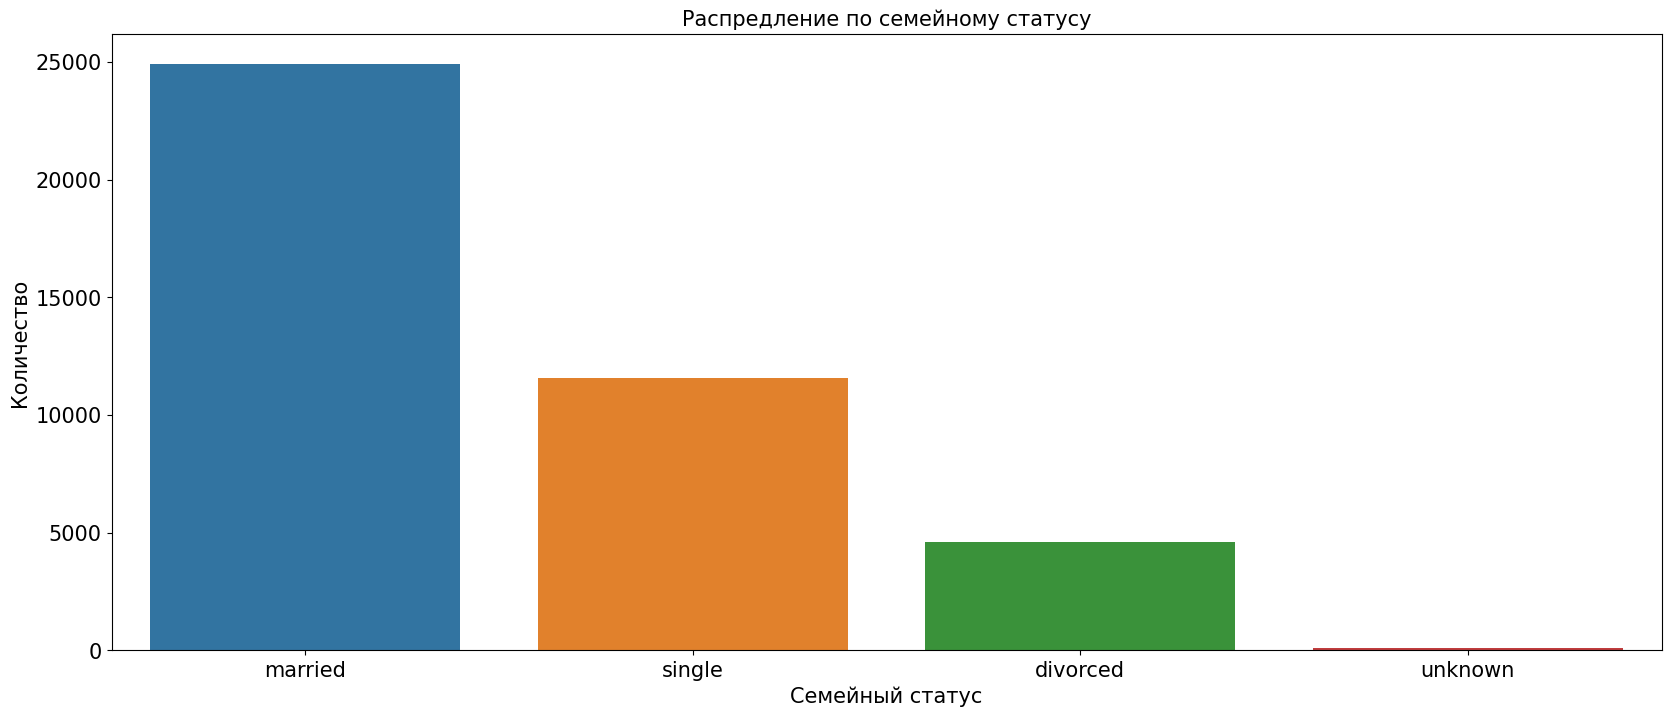

In [65]:
show_countplot(data=df_bank, column_name='marital', set_xl='Семейный статус',set_titl= 'Распредление по семейному статусу')

Отображаем сколько значений в столбце 'job'. 

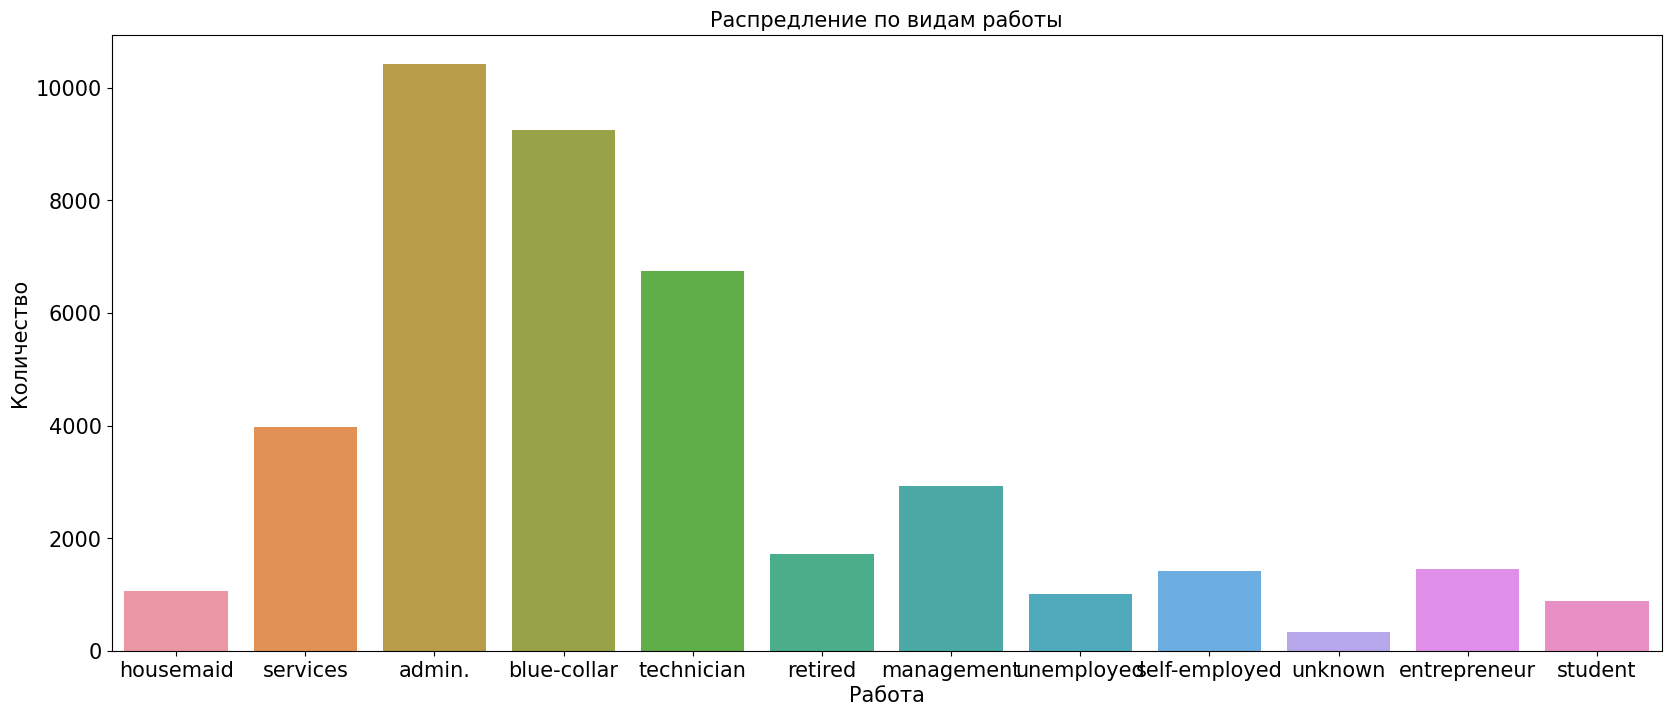

In [66]:
show_countplot(data=df_bank, column_name='job', set_xl='Работа',set_titl= 'Распредление по видам работы')

Отображаем сколько значений в столбце 'education'. 

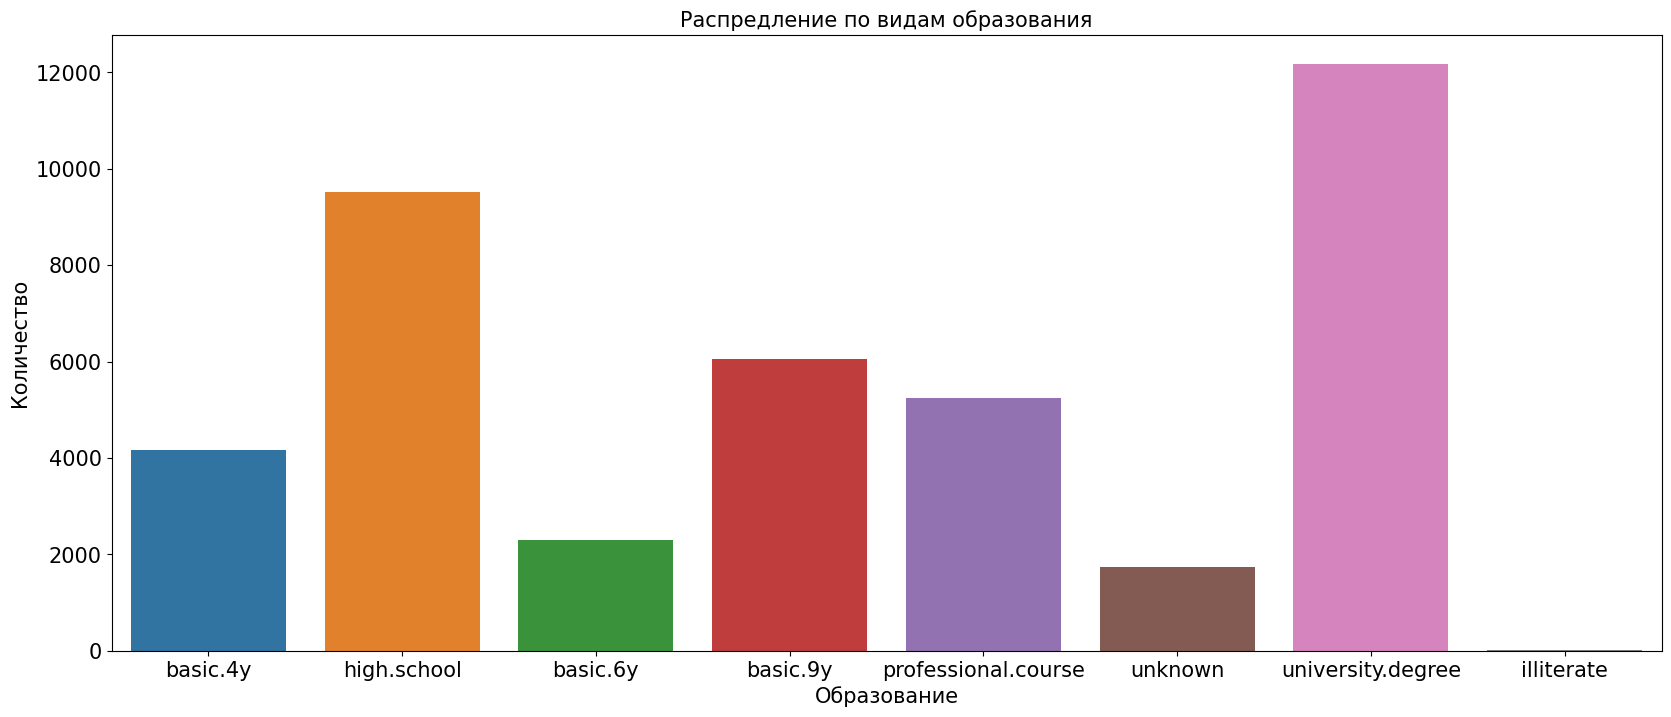

In [16]:
show_countplot(data=df_bank, column_name='education', set_xl='Образование',set_titl= 'Распредление по видам образования')

Отображаем сколько значений в столбце 'contact'. Видим, что клиенты предпочитают сотовую связь. 

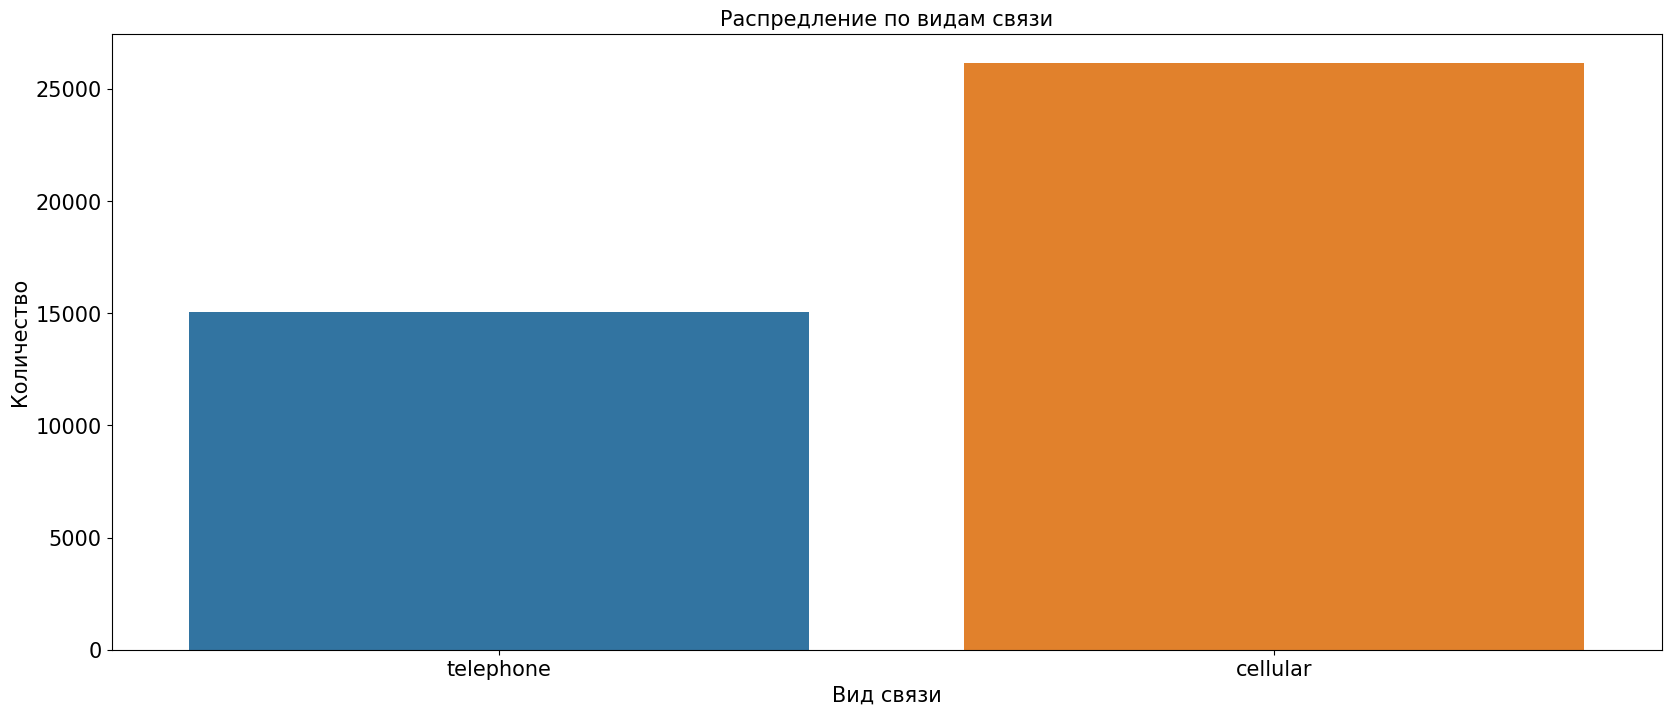

In [18]:
show_countplot(data=df_bank, column_name='contact', set_xl='Вид связи',set_titl= 'Распредление по видам связи')

Вывод: По данным графикам можно определить, что дальнейший анализ данных столбцов будет включать в себя преобразование категориальных значений в числовые. 

Функция, отображающая количество значений по разным столбцам 'default', 'loan', 'housing'. 

In [75]:
def show_countplot_default(df:pd.DataFrame, column_name: str):
    fig, ax = plt.subplots( figsize = (16,5))
    sns.countplot(x = column_name, data = df, ax = ax, order = ['no', 'unknown', 'yes'])
    ax.set_title(column_name.capitalize(), fontsize=15)
    ax.set_xlabel('')
    ax.set_ylabel('Count', fontsize=15)
    ax.tick_params(labelsize=15)

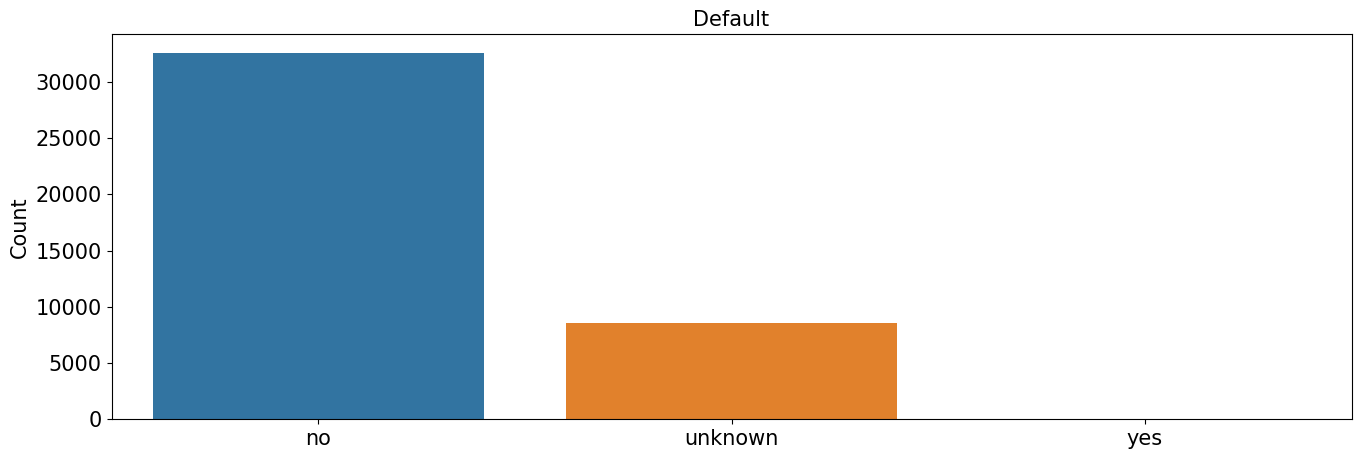

In [76]:
show_countplot_default(df_bank, column_name='default')

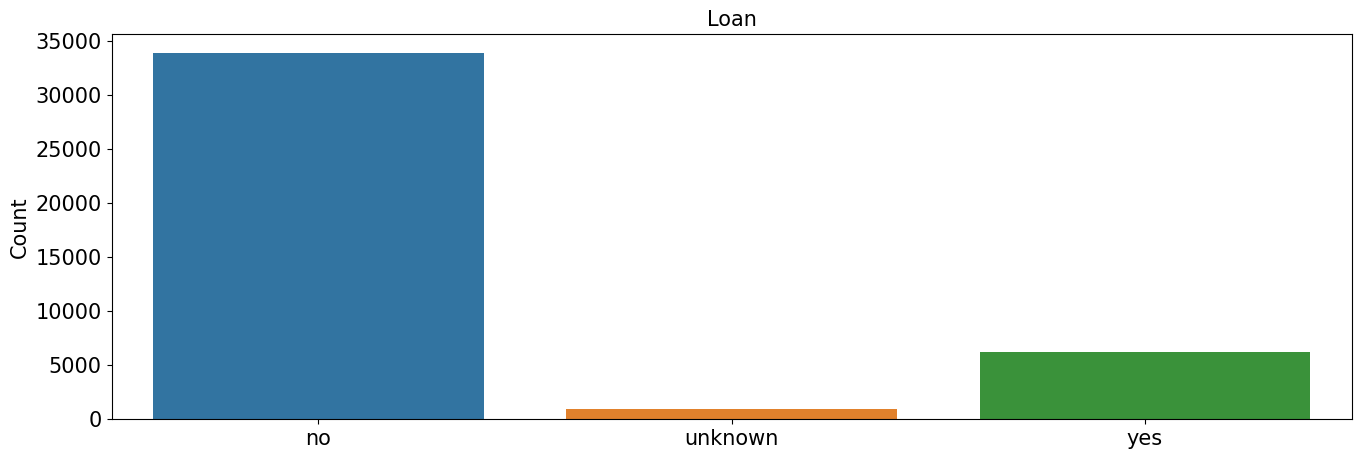

In [77]:
show_countplot_default(df_bank, column_name='loan')

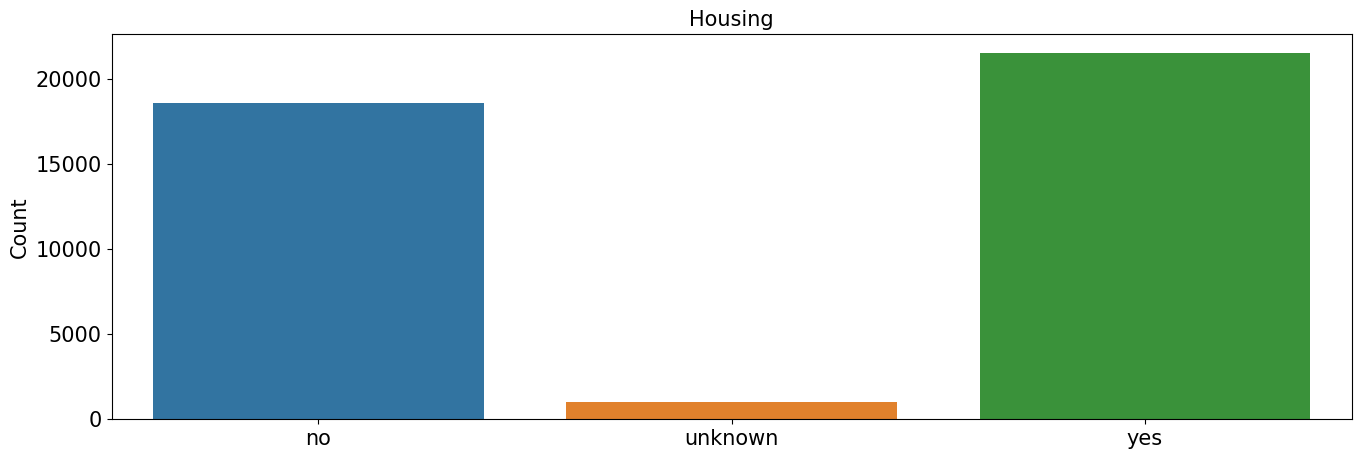

In [79]:
show_countplot_default(df_bank, column_name='housing')

Вывод: столбцы 'default', 'loan', 'housing' для того, чтобы просмотреть распредление людей.

Рассмотрим целевую переменую

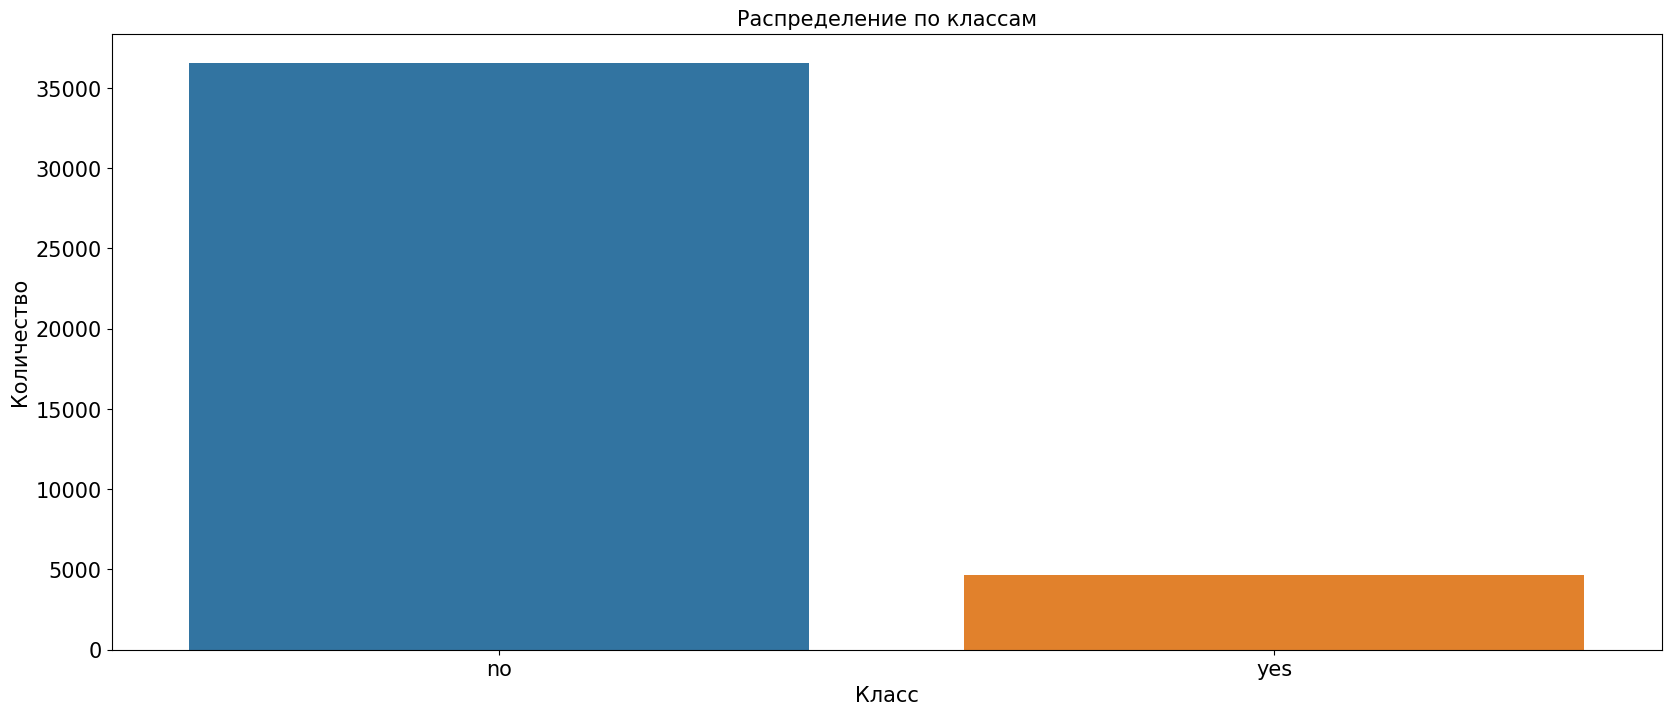

In [7]:
show_countplot(data=df_bank, column_name='y', set_xl='Класс',set_titl= 'Распределение по классам')

Можно увидеть, что преобладают значения "no". Это значит, что датасет является несбалансированным. 

Изобразим корреляционную матрицу. 

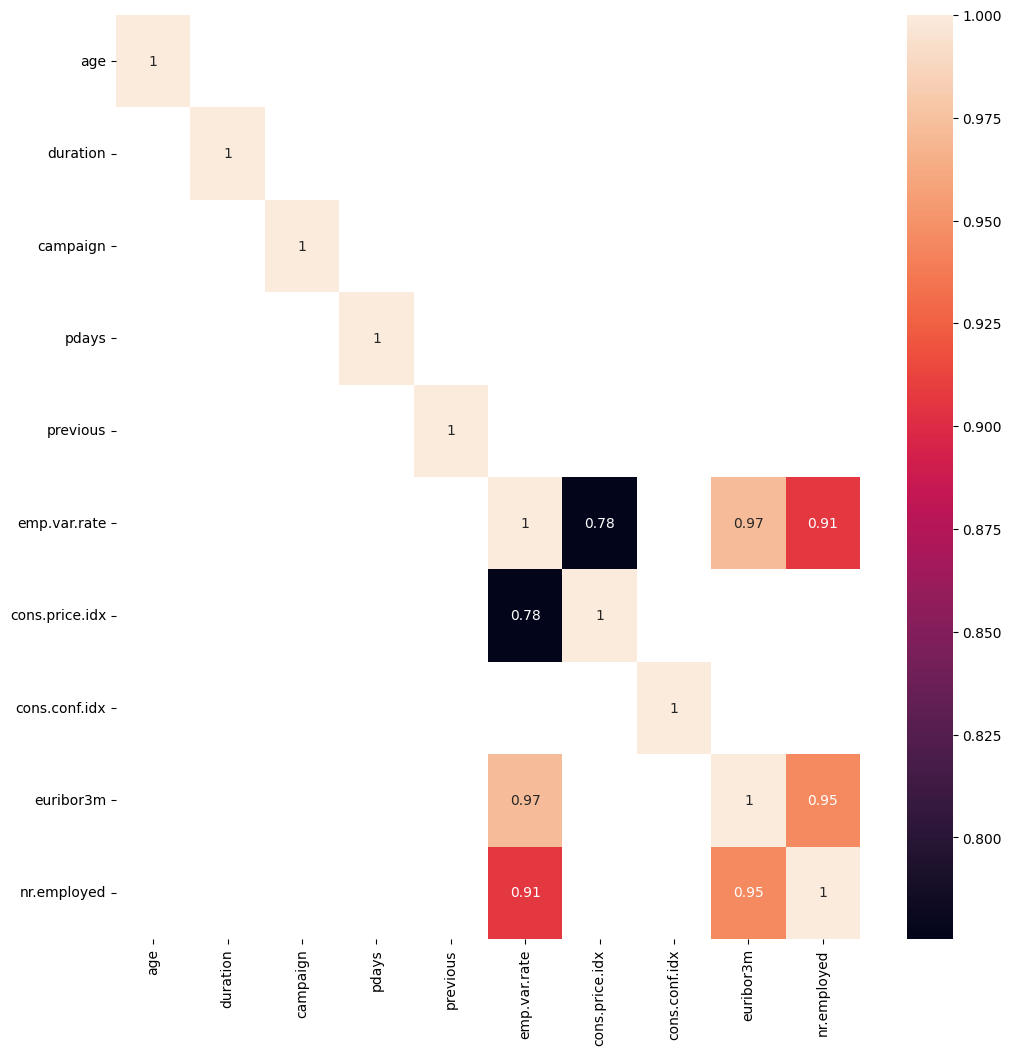

In [3]:
corr_good = df_bank.corr() 
plt.subplots(figsize=(12,12))
sns.heatmap(corr_good[corr_good>0.70], annot=True)
plt.show()

Вывод: можно отметить некоторую корреляцию между 'emp.var.rate' и 'euribor3m', а также между 'nr.employed' и 'euribor3m'.


### Преобразование данных

Преобразуем категориальную переменную в числовую.

In [3]:
categorical_column = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','day_of_week', 'poutcome']

for i in categorical_column:
    le = LabelEncoder()
    df_bank[i] = le.fit_transform(df_bank[i])
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


На предыдущем этапе было выявлено, что столбец 'pdays' имеет аномальное значений, поэтому необходимо исправить это.

In [4]:
df_bank['pdays'] = df_bank['pdays'].apply(lambda x: 0 if x==999 else(20 if x<=10 else(6 if x<=20 else 3)))

Функции change_age и change_duration преобразуют исходные числовые данные (на основе предварительного анализа) в более систематизированный набор данных, исключая выбросы и аномальные значения.

In [5]:
def change_age(df: pd.DataFrame):
    try:
        df.loc[df['age'] <= 32, 'age'] = 1
        df.loc[(df['age'] > 32) & (df['age'] <= 47), 'age'] = 2
        df.loc[(df['age'] > 47) & (df['age'] <= 70), 'age'] = 3
        df.loc[(df['age'] > 70) & (df['age'] <= 98), 'age'] = 4
           
        return df
    except KeyError:
        print("Столбца 'age' нет в таблице")

In [6]:
def change_duration(df: pd.DataFrame):
    df.loc[df['duration'] <= 102, 'duration'] = 1
    df.loc[(df['duration'] > 102) & (df['duration'] <= 180)  , 'duration'] = 2
    df.loc[(df['duration'] > 180) & (df['duration'] <= 319)  , 'duration'] = 3
    df.loc[(df['duration'] > 319) & (df['duration'] <= 644.5), 'duration'] = 4
    df.loc[df['duration']  > 644.5, 'duration'] = 5
    return df


In [7]:
change_age(df_bank)
change_duration(df_bank)
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,3,7,1,3,1,0,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,1,3,0,2,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,2,0,1,1,0,0,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,3,7,1,3,0,0,2,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,no


Преобразуем целевую переменную y (будет ли клиент банка подписываться на новый продукт (депозит) или нет).

In [8]:
y = pd.get_dummies(df_bank['y'], columns = ['y'], prefix = ['y'], drop_first = True)
y.rename(columns={"['y']_yes":'y'})

,y
0,0
1,0
2,0
3,0
4,0
...,...
41183,1
41184,0
41185,0
41186,1


### Очистка данных

Удалим столбцы, которые не будут влиять на дальнейший анализ.

In [9]:
df_bank.drop(['day_of_week', 'contact', 'month'], axis=1, inplace = True)

Удалим целевую переменную из исходной таблицы данных.

In [10]:
df_bank.drop('y', axis=1, inplace = True)
df_bank.head()

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,3,1,0,0,0,0,3,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0
1,3,7,1,3,1,0,0,2,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0
2,2,7,1,3,0,2,0,3,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0
3,2,0,1,1,0,0,0,2,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0
4,3,7,1,3,0,0,2,3,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0


### Разделение на обучающую и тестовую выборки

Разделяем обучающую и тестовую выборку на 70/30. Указываем random_state, чтобы генерируемые псевдослучайные величины имели одни и те же значения при каждом вызове. Это необходимо, чтобы в дальнейшем при сравнении несколько методов или разных наборов параметров, были использованы одинаковые обучающие и проверочные данные. 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df_bank, y, test_size = 0.3, random_state = 0)

### Метрики 

Функция show_metrics необходима для подсчета и вывода всех используемых метрик для каждой модели. Метрики необходимы, чтобы оценить качество модели. 
Используемые метрики при решении задачи классификации:  
1. Точность (accuracy) 
2. AUC-ROC (Area Under the ROC Curve) 
3. F1
4. Точность (precision)
5. Полнота (recall)

Точность (accuracy), точность (precision), F1, полнота (recall) - данные метрики часто используются при анализе об эффективности модели.
AUC-ROC (Area Under the ROC Curve) - это метрика, которая является мерой качества бинарной классификации.


In [21]:
def show_metrics(clf, x_train,x_test,y_train,y_test):
    y_test_predict = clf.predict(x_test)
    y_train_predict = clf.predict(x_train)
    accuracy_test = accuracy_score(y_test,y_test_predict)
    accuracy_train =  accuracy_score(y_train,y_train_predict)

    roc_test = roc_auc_score(y_test, y_test_predict, multi_class='ovr')
    roc_train = roc_auc_score(y_train, y_train_predict, multi_class='ovr')

    f1 = f1_score(y_test, y_test_predict)
    precision = precision_score(y_test, y_test_predict)
    recall = recall_score(y_test, y_test_predict) 

    print('Train accuracy:',accuracy_train )
    print('Test accuracy:',accuracy_test )
    print('-'*30)
    print('Train ROC:', roc_train)
    print('Test ROC:',roc_test )
    print('-'*30)
    print("F score:",f1 )
    print("Precision:",precision)
    print("Recall:", recall)

    print(classification_report(y_test, y_test_predict, target_names=['no', 'yes']))


Функция find_best_parametrs с помощью RandomizedSearchCV настраивает гиперпараметры модели, выявляет лучший результат и вычисляет метрики новой модели.

RandomizedSearchCV сначала создает словарь с несколькими случайно выбранными параметрами из всех переданных значений.

In [22]:
def find_best_parametrs(param, clf, x_train,x_test,y_train,y_test):
    randm_src = RandomizedSearchCV(estimator=clf, param_distributions = param,scoring='roc_auc', cv=5)
    randm_src.fit(x_train, y_train)
    best_model = randm_src.best_estimator_

    print("Резульаты" )
    print("Лучший оценщик (estimator):", randm_src.best_estimator_)
    print("Лучший результат (score):", randm_src.best_score_)
    print("Лучшие параметры:", randm_src.best_params_)
    print('-'*30)
    print('Метрики:')
    show_metrics(best_model, x_train,x_test,y_train,y_test)
    
    

Функция find_best_parametrs с помощью GridSearchCV настраивает гиперпараметры модели, выявляет лучший результат и вычисляет метрики новой модели.

GridSearchCV перебирает все возможные комбинации параметров.

In [23]:
def find_best_parametrs_GridSearchCV(param, clf, x_train,x_test,y_train,y_test):
    grid_src = GridSearchCV(estimator=clf, param_grid = param, cv=5)
    grid_src.fit(x_train, y_train)
    best_model = grid_src.best_estimator_

    print("Резульаты" )
    print("Лучший оценщик (estimator):", grid_src.best_estimator_)
    print("Лучший результат (score):", grid_src.best_score_)
    print("Лучшие параметры:", grid_src.best_params_)
    print('-'*30)
    print('Метрики:')
    show_metrics(best_model, x_train,x_test,y_train,y_test)
    

Функция для отображения дерева решений.

In [24]:
def show_tree_pic(model):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(model, 
                   feature_names=list(df_bank.columns.values),  
                   class_names=['0','1'],
                   filled=True)


Функция вывода матрицы ошибок которая позволяет визуализировать эффективность алгоритма классификации путем сравнения прогнозируемого значения целевой переменной с ее фактическим значением.

In [25]:
def show_conf_matr(clf, x_train,x_test,y_train,y_test):
    y_test_predict = clf.predict(x_test)
    print(confusion_matrix(y_test, y_test_predict))


### Построение моделей и их сравнение

Модели:
1. DecisionTreeClassifier без различных гиперпараметров
2. DecisionTreeClassifier с гиперпараметром max_depth = 4
3. DecisionTreeClassifier с использованием RandomizedSearchCV
4. DecisionTreeClassifier с использованием GridSearchCV
5. DecisionTreeClassifier с использованием BaggingClassifier
6. Random Forest со случайно подобраными гиперпараметрами 
7. Random Forest с использованием RandomizedSearchCV
8. Random Forest с использованием GridSearchCV
9. ExtraTreesClassifier
10. Gradient Boosted Trees
11. LogisticRegression
12. GaussianNB
13. ANN

Последние три модели используются для сравнительного анализа.

DecisionTreeClassifier без различных гиперпараметров

In [26]:
%%time
dtree_model = DecisionTreeClassifier(random_state=0, class_weight={0:1, 1:8})
dtree_model.fit(X_train, y_train)
y_test_predict = dtree_model.predict(X_test)
show_metrics(dtree_model, X_train, X_test, y_train, y_test)

Train accuracy: 0.9968089903229163
Test accuracy: 0.8871894472768471
------------------------------
Train ROC: 0.998201649790844
Test ROC: 0.7086524691145574
------------------------------
F score: 0.48787656135194707
Precision: 0.49775112443778113
Recall: 0.4783861671469741
              precision    recall  f1-score   support

          no       0.93      0.94      0.94     10969
         yes       0.50      0.48      0.49      1388

    accuracy                           0.89     12357
   macro avg       0.72      0.71      0.71     12357
weighted avg       0.89      0.89      0.89     12357

CPU times: total: 125 ms
Wall time: 124 ms


In [27]:
show_conf_matr(dtree_model, X_train, X_test, y_train, y_test)

[[10299   670]
 [  724   664]]


Точность показывает результат - 0.89, но надо также учитывать другие метрики.

С помощью tree.export_text можно представить текстовый отчет, который описывает правила создания дерева решений для конкретной модели.

In [41]:
text_representation = tree.export_text(dtree_model)
print(text_representation)

|--- feature_16 <= 5087.65
|   |--- feature_7 <= 1.50
|   |   |--- feature_9 <= 1.00
|   |   |   |--- feature_13 <= 92.68
|   |   |   |   |--- feature_10 <= 0.50
|   |   |   |   |   |--- feature_11 <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_11 >  0.50
|   |   |   |   |   |   |--- feature_3 <= 5.50
|   |   |   |   |   |   |   |--- feature_1 <= 3.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_1 >  3.00
|   |   |   |   |   |   |   |   |--- feature_15 <= 0.88
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 3.50
|   |   |   |   |   |   |   |   |   |   |--- feature_15 <= 0.78
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- feature_15 >  0.78
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_3 >  3.50
|   |   |   |   |   |   |   |   |   |   |--- feature_14 <= -29.83
|   |   |   | 

DecisionTreeClassifier с гиперпараметром max_depth = 4

Train accuracy: 0.8128056605736881
Test accuracy: 0.8144371611232499
------------------------------
Train ROC: 0.8478002235747757
Test ROC: 0.8482810346055152
------------------------------
F score: 0.5191864122457539
Precision: 0.3661638568470867
Recall: 0.8919308357348703
              precision    recall  f1-score   support

          no       0.98      0.80      0.89     10969
         yes       0.37      0.89      0.52      1388

    accuracy                           0.81     12357
   macro avg       0.67      0.85      0.70     12357
weighted avg       0.91      0.81      0.84     12357

CPU times: total: 172 ms
Wall time: 150 ms


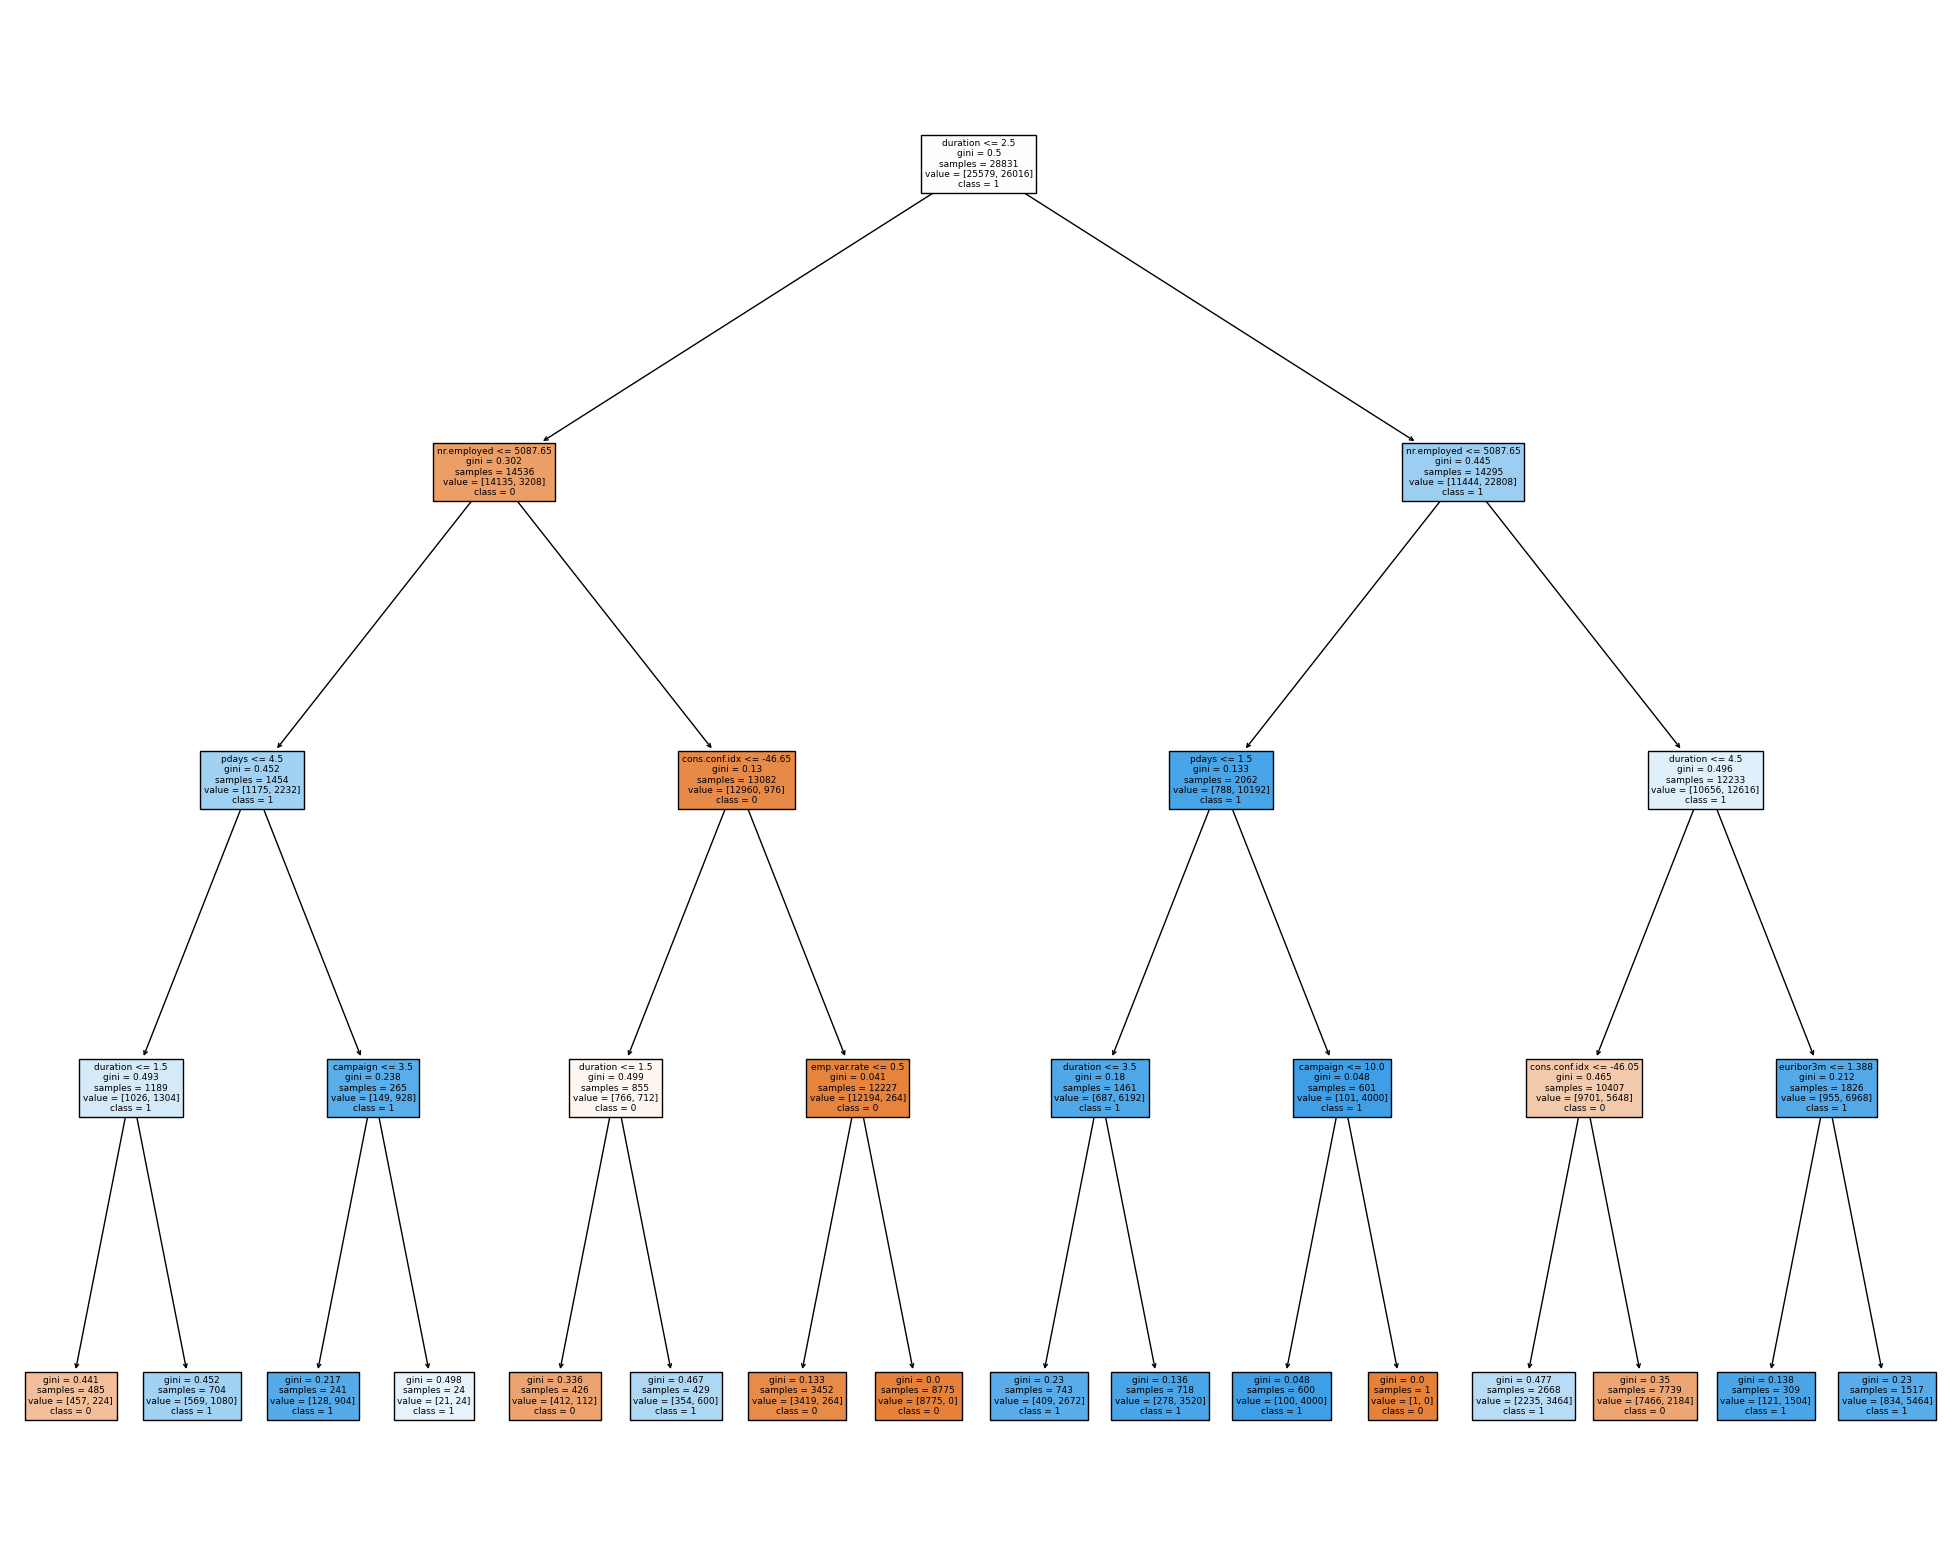

In [28]:
%%time
middle_model_tree = DecisionTreeClassifier(max_depth=4, random_state=0, class_weight={0:1, 1:8})
middle_model_tree.fit(X_train, y_train)
show_metrics(middle_model_tree, X_train, X_test, y_train, y_test)
show_tree_pic(middle_model_tree)

Данная модель получена, чтобы продемонстрировать удобную визуальную составляющую дерева решений, где можно наглядно увидеть конечные классы. Однако удобно это только в случае, если гиперпараметры модели не велики.

DecisionTreeClassifier с использованием RandomizedSearchCV

In [47]:
%%time
param_tree = {'max_depth':np.arange(5,30),
              'min_samples_split': np.arange(5,30,1),
             'min_samples_leaf':np.arange(5,30),
              'min_samples_split' : np.arange(5,20),
              'criterion': ('gini', 'entropy')}

find_best_parametrs(param_tree,DecisionTreeClassifier(random_state=0, class_weight={0:1, 1:8}), X_train,X_test,y_train,y_test)

Резульаты
Лучший оценщик (estimator): DecisionTreeClassifier(class_weight={0: 1, 1: 8}, criterion='entropy',
                       max_depth=5, min_samples_leaf=9, min_samples_split=15,
                       random_state=0)
Лучший результат (score): 0.9284875062374747
Лучшие параметры: {'min_samples_split': 15, 'min_samples_leaf': 9, 'max_depth': 5, 'criterion': 'entropy'}
------------------------------
Метрики:
Train accuracy: 0.8616072977003919
Test accuracy: 0.8651776321113539
------------------------------
Train ROC: 0.8565146580352782
Test ROC: 0.8598706125699278
------------------------------
F score: 0.587010411502231
Precision: 0.4474678760393046
Recall: 0.8530259365994236
              precision    recall  f1-score   support

          no       0.98      0.87      0.92     10969
         yes       0.45      0.85      0.59      1388

    accuracy                           0.87     12357
   macro avg       0.71      0.86      0.75     12357
weighted avg       0.92      0.87   

Точность показывает хороший результат - 0.87 и recall на классах высок.

In [51]:
best_model_tree = DecisionTreeClassifier(class_weight={0: 1, 1: 8}, criterion='entropy',
                       max_depth=5, min_samples_leaf=9, min_samples_split=15,
                       random_state=0)
best_model_tree.fit(X_train, y_train)
show_metrics(best_model_tree, X_train, X_test, y_train, y_test)


Train accuracy: 0.8616072977003919
Test accuracy: 0.8651776321113539
------------------------------
Train ROC: 0.8565146580352782
Test ROC: 0.8598706125699278
------------------------------
F score: 0.587010411502231
Precision: 0.4474678760393046
Recall: 0.8530259365994236
              precision    recall  f1-score   support

          no       0.98      0.87      0.92     10969
         yes       0.45      0.85      0.59      1388

    accuracy                           0.87     12357
   macro avg       0.71      0.86      0.75     12357
weighted avg       0.92      0.87      0.88     12357



In [52]:
show_conf_matr(best_model_tree, X_train, X_test, y_train, y_test)

[[9507 1462]
 [ 204 1184]]


DecisionTreeClassifier с использованием GridSearchCV

In [54]:
%%time
param_tree = {'max_depth':np.arange(15,25),
              'min_samples_split': np.arange(15,25,1),
             'min_samples_leaf':np.arange(15,25),
              'min_samples_split' : np.arange(15,25),
              'criterion': ('gini', 'entropy')}

find_best_parametrs_GridSearchCV(param_tree,DecisionTreeClassifier(random_state=0, class_weight={0: 1, 1: 6}), X_train,X_test,y_train,y_test)


Резульаты
Лучший оценщик (estimator): DecisionTreeClassifier(class_weight={0: 1, 1: 6}, max_depth=15,
                       min_samples_leaf=21, min_samples_split=15,
                       random_state=0)
Лучший результат (score): 0.8574796883075516
Лучшие параметры: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 21, 'min_samples_split': 15}
------------------------------
Метрики:
Train accuracy: 0.8692726579029517
Test accuracy: 0.8608076393946751
------------------------------
Train ROC: 0.895459305173606
Test ROC: 0.8646460236511436
------------------------------
F score: 0.5839380745041122
Precision: 0.4395484340859432
Recall: 0.8695965417867435
              precision    recall  f1-score   support

          no       0.98      0.86      0.92     10969
         yes       0.44      0.87      0.58      1388

    accuracy                           0.86     12357
   macro avg       0.71      0.86      0.75     12357
weighted avg       0.92      0.86      0.88     12357

C

С class_weight точность модели упала.

In [48]:
%%time
param_tree = {'max_depth':np.arange(20,25),
              'min_samples_split': np.arange(20,25,1),
             'min_samples_leaf':np.arange(20,25),
              'min_samples_split' : np.arange(20,25),
              'criterion': ('gini', 'entropy')}

find_best_parametrs_GridSearchCV(param_tree,DecisionTreeClassifier(random_state=0), X_train,X_test,y_train,y_test)


Резульаты
Лучший оценщик (estimator): DecisionTreeClassifier(criterion='entropy', max_depth=23, min_samples_leaf=20,
                       min_samples_split=20, random_state=0)
Лучший результат (score): 0.9002702142662434
Лучшие параметры: {'criterion': 'entropy', 'max_depth': 23, 'min_samples_leaf': 20, 'min_samples_split': 20}
------------------------------
Метрики:
Train accuracy: 0.9191915242972751
Test accuracy: 0.8761026139030509
------------------------------
Train ROC: 0.9191915242972751
Test ROC: 0.8304691463471985
------------------------------
F score: 0.5831745167438062
Precision: 0.4687089715536105
Recall: 0.771613832853026
              precision    recall  f1-score   support

          no       0.97      0.89      0.93     10969
         yes       0.47      0.77      0.58      1388

    accuracy                           0.88     12357
   macro avg       0.72      0.83      0.76     12357
weighted avg       0.91      0.88      0.89     12357

CPU times: total: 2min 21s


Точность стала лучше.

DecisionTreeClassifier с использованием BaggingClassifier


In [65]:
%%time 

model_bagging = BaggingClassifier(base_estimator = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=25, max_depth=8, criterion='gini',class_weight={0: 1, 1: 4}),n_estimators = 500)

show_metrics(model_bagging.fit(X_train, y_train), X_train,X_test,y_train,y_test)



Train accuracy: 0.8970205681384621
Test accuracy: 0.8980335032774945
------------------------------
Train ROC: 0.8707016530367032
Test ROC: 0.8673646493405702
------------------------------
F score: 0.645868465430017
Precision: 0.5294930875576037
Recall: 0.8278097982708934
              precision    recall  f1-score   support

          no       0.98      0.91      0.94     10969
         yes       0.53      0.83      0.65      1388

    accuracy                           0.90     12357
   macro avg       0.75      0.87      0.79     12357
weighted avg       0.93      0.90      0.91     12357

CPU times: total: 28 s
Wall time: 28.3 s


Точнось достигла рекордного 0.9, при этом метрика recall тоже на высоком уровне. Это значит, что модель успешно распознает и классифицирует объекты всех классов и не пропускает ни одного объекта положительного класса.

RandomForestClassifier со случайно подобраными гиперпараметрами 


In [71]:
%%time
random_model_tree = RandomForestClassifier(n_estimators = 200, n_jobs=2, random_state = 12)
random_model_tree.fit(X_train, y_train)
show_metrics(random_model_tree, X_train, X_test, y_train, y_test)


Train accuracy: 0.9970864694252715
Test accuracy: 0.9099295945617868
------------------------------
Train ROC: 0.9900373644066398
Test ROC: 0.7290128349661333
------------------------------
F score: 0.5528324628364806
Precision: 0.6248864668483197
Recall: 0.4956772334293948
              precision    recall  f1-score   support

          no       0.94      0.96      0.95     10969
         yes       0.62      0.50      0.55      1388

    accuracy                           0.91     12357
   macro avg       0.78      0.73      0.75     12357
weighted avg       0.90      0.91      0.91     12357

CPU times: total: 8.3 s
Wall time: 4.25 s


Модель показывает одни из лучших результатов по точности.

 Random Forest с использованием RandomizedSearchCV

In [78]:
%%time
param_tree_random = {'n_estimators' : np.arange(100,1000, 100),
              'max_depth' : np.arange(3,20,1),
              'min_samples_split' : np.arange(3,20,1),
              'min_samples_leaf' : np.arange(3,20,1),
         'max_features': ('sqrt', 'log2'), 'criterion': ('gini', 'entropy')}


find_best_parametrs(param_tree_random,RandomForestClassifier(random_state=0, class_weight={0: 1, 1: 6}), X_train,X_test,y_train,y_test)

Резульаты
Лучший оценщик (estimator): RandomForestClassifier(class_weight={0: 1, 1: 6}, criterion='entropy',
                       max_depth=19, min_samples_leaf=11, min_samples_split=12,
                       n_estimators=600, random_state=0)
Лучший результат (score): 0.9386466467606402
Лучшие параметры: {'n_estimators': 600, 'min_samples_split': 12, 'min_samples_leaf': 11, 'max_features': 'sqrt', 'max_depth': 19, 'criterion': 'entropy'}
------------------------------
Метрики:
Train accuracy: 0.8914016163157712
Test accuracy: 0.886784818321599
------------------------------
Train ROC: 0.8994756050125107
Test ROC: 0.8729852179695305
------------------------------
F score: 0.6292075271667108
Precision: 0.49769392033542975
Recall: 0.8551873198847262
              precision    recall  f1-score   support

          no       0.98      0.89      0.93     10969
         yes       0.50      0.86      0.63      1388

    accuracy                           0.89     12357
   macro avg       0.7

In [128]:
%%time
random_model_tree_random =  RandomForestClassifier(class_weight={0: 1, 1: 6}, criterion='entropy',
                       max_depth=19, min_samples_leaf=11, min_samples_split=12,
                       n_estimators=600, random_state=0)
random_model_tree_random.fit(X_train, y_train)
show_metrics(random_model_tree_random, X_train, X_test, y_train, y_test)


Train accuracy: 0.8914016163157712
Test accuracy: 0.886784818321599
------------------------------
Train ROC: 0.8994756050125107
Test ROC: 0.8729852179695305
------------------------------
F score: 0.6292075271667108
Precision: 0.49769392033542975
Recall: 0.8551873198847262
              precision    recall  f1-score   support

          no       0.98      0.89      0.93     10969
         yes       0.50      0.86      0.63      1388

    accuracy                           0.89     12357
   macro avg       0.74      0.87      0.78     12357
weighted avg       0.93      0.89      0.90     12357

CPU times: total: 16.8 s
Wall time: 17 s


Random Forest с использованием GridSearchCV

In [81]:
%%time
param_tree_random = {'n_estimators' : np.arange(10,15, 2),
              'max_depth' : np.arange(4,7,1),
              'min_samples_split' : np.arange(8,13,1),
              'min_samples_leaf' : np.arange(8,10,1),
         'max_features': ('sqrt', 'log2'), 'criterion': ('gini', 'entropy')}


find_best_parametrs_GridSearchCV(param_tree_random,RandomForestClassifier(random_state=0, class_weight={0: 1, 1: 6}), X_train,X_test,y_train,y_test)

Резульаты
Лучший оценщик (estimator): RandomForestClassifier(class_weight={0: 1, 1: 6}, max_depth=6,
                       min_samples_leaf=8, min_samples_split=8, n_estimators=14,
                       random_state=0)
Лучший результат (score): 0.8609137496398016
Лучшие параметры: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 14}
------------------------------
Метрики:
Train accuracy: 0.8615032430370088
Test accuracy: 0.8660678158128996
------------------------------
Train ROC: 0.8661187223702254
Test ROC: 0.8647770912156687
------------------------------
F score: 0.5914588990372748
Precision: 0.4498685692827638
Recall: 0.8631123919308358
              precision    recall  f1-score   support

          no       0.98      0.87      0.92     10969
         yes       0.45      0.86      0.59      1388

    accuracy                           0.87     12357
   macro avg       0.72      0.86      0.76     12357


ExtraTreesClassifier

In [95]:
%%time
ext_model = ExtraTreesClassifier(n_estimators=500, random_state=0, class_weight={0: 1, 1: 4},max_depth=10)
ext_model.fit(X_train, y_train)
show_metrics(ext_model, X_train, X_test, y_train, y_test)

Train accuracy: 0.8998647289376018
Test accuracy: 0.8968196164117505
------------------------------
Train ROC: 0.866936360291708
Test ROC: 0.8581854206365699
------------------------------
F score: 0.6376811594202898
Precision: 0.5265133740028156
Recall: 0.80835734870317
              precision    recall  f1-score   support

          no       0.97      0.91      0.94     10969
         yes       0.53      0.81      0.64      1388

    accuracy                           0.90     12357
   macro avg       0.75      0.86      0.79     12357
weighted avg       0.92      0.90      0.91     12357

CPU times: total: 6.64 s
Wall time: 6.65 s


Модель показывает хороший результаты.

Gradient Boosted Trees

In [106]:
%%time
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_features=5, max_depth=80, random_state=0) 
gb_clf.fit(X_train, y_train)
show_metrics(gb_clf, X_train, X_test, y_train, y_test)

Train accuracy: 0.9970864694252715
Test accuracy: 0.9065307113377034
------------------------------
Train ROC: 0.9874874836066082
Test ROC: 0.7355938322907917
------------------------------
F score: 0.553191489361702
Precision: 0.5973266499582289
Recall: 0.5151296829971181
              precision    recall  f1-score   support

          no       0.94      0.96      0.95     10969
         yes       0.60      0.52      0.55      1388

    accuracy                           0.91     12357
   macro avg       0.77      0.74      0.75     12357
weighted avg       0.90      0.91      0.90     12357

CPU times: total: 10.8 s
Wall time: 10.8 s


Точность хороша, но полнота на положительном классе не очень большая. 

LogisticRegression


In [123]:
%%time
logmodel = LogisticRegression(class_weight={0: 1, 1: 8})
logmodel.fit(X_train,y_train)
show_metrics(logmodel, X_train, X_test, y_train, y_test)

Train accuracy: 0.8230377024730325
Test accuracy: 0.8235817755118556
------------------------------
Train ROC: 0.8362543240253154
Test ROC: 0.8395874225581498
------------------------------
F score: 0.5227670753064798
Precision: 0.3754716981132076
Recall: 0.8602305475504323
              precision    recall  f1-score   support

          no       0.98      0.82      0.89     10969
         yes       0.38      0.86      0.52      1388

    accuracy                           0.82     12357
   macro avg       0.68      0.84      0.71     12357
weighted avg       0.91      0.82      0.85     12357

CPU times: total: 688 ms
Wall time: 463 ms


Результаты точности хорошие, но полнота хуже, чем на других моделях.

GaussianNB


In [118]:
%%time
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
show_metrics(gaussiannb, X_train, X_test, y_train, y_test)

Train accuracy: 0.8486004647774964
Test accuracy: 0.8468884033341426
------------------------------
Train ROC: 0.7190063011502315
Test ROC: 0.7164729432671536
------------------------------
F score: 0.44581136496777973
Precision: 0.37561697926949655
Recall: 0.5482708933717579
              precision    recall  f1-score   support

          no       0.94      0.88      0.91     10969
         yes       0.38      0.55      0.45      1388

    accuracy                           0.85     12357
   macro avg       0.66      0.72      0.68     12357
weighted avg       0.88      0.85      0.86     12357

CPU times: total: 62.5 ms
Wall time: 60 ms


Модель показывает плохую точность.

In [124]:
diff_models = {'DecisionTreeClassifier':DecisionTreeClassifier(random_state=0, class_weight={0:1, 1:8}),
'DecisionTreeClassifierRandomizedSearchCV':DecisionTreeClassifier(max_depth=31, min_samples_leaf=17, min_samples_split=13,
                       random_state=0, criterion= 'gini'),
               
'BaggingClassifier':BaggingClassifier(base_estimator = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=25, max_depth=8, criterion='gini',class_weight={0: 1, 1: 4}),n_estimators = 500),
'RandomForest':RandomForestClassifier(n_estimators = 200, n_jobs=2, random_state = 12),
'RandomForestRandomizedSearchCV':RandomForestClassifier(class_weight={0: 1, 1: 6}, criterion='entropy',
                       max_depth=19, min_samples_leaf=11, min_samples_split=12,
                       n_estimators=600, random_state=0), 

'ExtraTreesClassifier':ExtraTreesClassifier(n_estimators=500, random_state=0, class_weight={0: 1, 1: 4},max_depth=10), 
'Gradient Boosted Trees':GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_features=5, max_depth=80, random_state=0) ,
'LogisticRegression':LogisticRegression(class_weight={0: 1, 1: 8}),
'GaussianNB':GaussianNB()}

In [119]:
def return_accur_score_model(model, x_train, x_test, y_train, y_test):
    clf = model
    clf.fit(X_train, y_train)

    y_test_predict = clf.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_test_predict)
    roc_test = roc_auc_score(y_test, y_test_predict, multi_class='ovr')
    f1 = f1_score(y_test, y_test_predict)
    precision = precision_score(y_test, y_test_predict)
    recall = recall_score(y_test, y_test_predict) 



    return accuracy_test, roc_test, f1, precision, recall

In [121]:
list(diff_models.keys())

['DecisionTreeClassifier',
 'DecisionTreeClassifierRandomizedSearchCV',
 'BaggingClassifier',
 'RandomForest',
 'RandomForestRandomizedSearchCV',
 'ExtraTreesClassifier',
 'Gradient Boosted Trees',
 'LogisticRegression',
 'GaussianNB']

In [134]:
acur_list = []
roc_list = []
f1_list=[]
precision_list = []
recall_list=[]
for i, (k, v) in enumerate(diff_models.items()):
    accuracy_test, roc_test, f1, precision, recall = return_accur_score_model(v, X_train, X_test, y_train, y_test )

    acur_list.append(accuracy_test)
    roc_list.append(roc_test)
    f1_list.append(f1)
    precision_list.append(precision)
    recall_list.append(recall)
df_models = pd.DataFrame({
                'Models': list(diff_models.keys()),
                'Accuracy': acur_list,
                'ROC':roc_list, 
                'F1':f1_list, 'Precision':precision_list,
                'Recall':recall_list
                })

df_models.sort_values(by='Accuracy', ascending=False)

,Models,Accuracy,ROC,F1,Precision,Recall
3,RandomForest,0.909930,0.729013,0.552832,0.624886,0.495677
1,DecisionTreeClassifierRandomizedSearchCV,0.907259,0.725935,0.543790,0.607651,0.492075
6,Gradient Boosted Trees,0.906531,0.735594,0.553191,0.597327,0.515130
2,BaggingClassifier,0.897872,0.866959,0.645306,0.529032,0.827089
5,ExtraTreesClassifier,0.896820,0.858185,0.637681,0.526513,0.808357
0,DecisionTreeClassifier,0.887189,0.708652,0.487877,0.497751,0.478386
4,RandomForestRandomizedSearchCV,0.886785,0.872985,0.629208,0.497694,0.855187
8,GaussianNB,0.846888,0.716473,0.445811,0.375617,0.548271
7,LogisticRegression,0.823582,0.839587,0.522767,0.375472,0.860231


Исходя из таблицы, можно сделать вывод, RandomForest лидирует по точности, но по общим метрикам можно выделить ExtraTreesClassifier и BaggingClassifier.

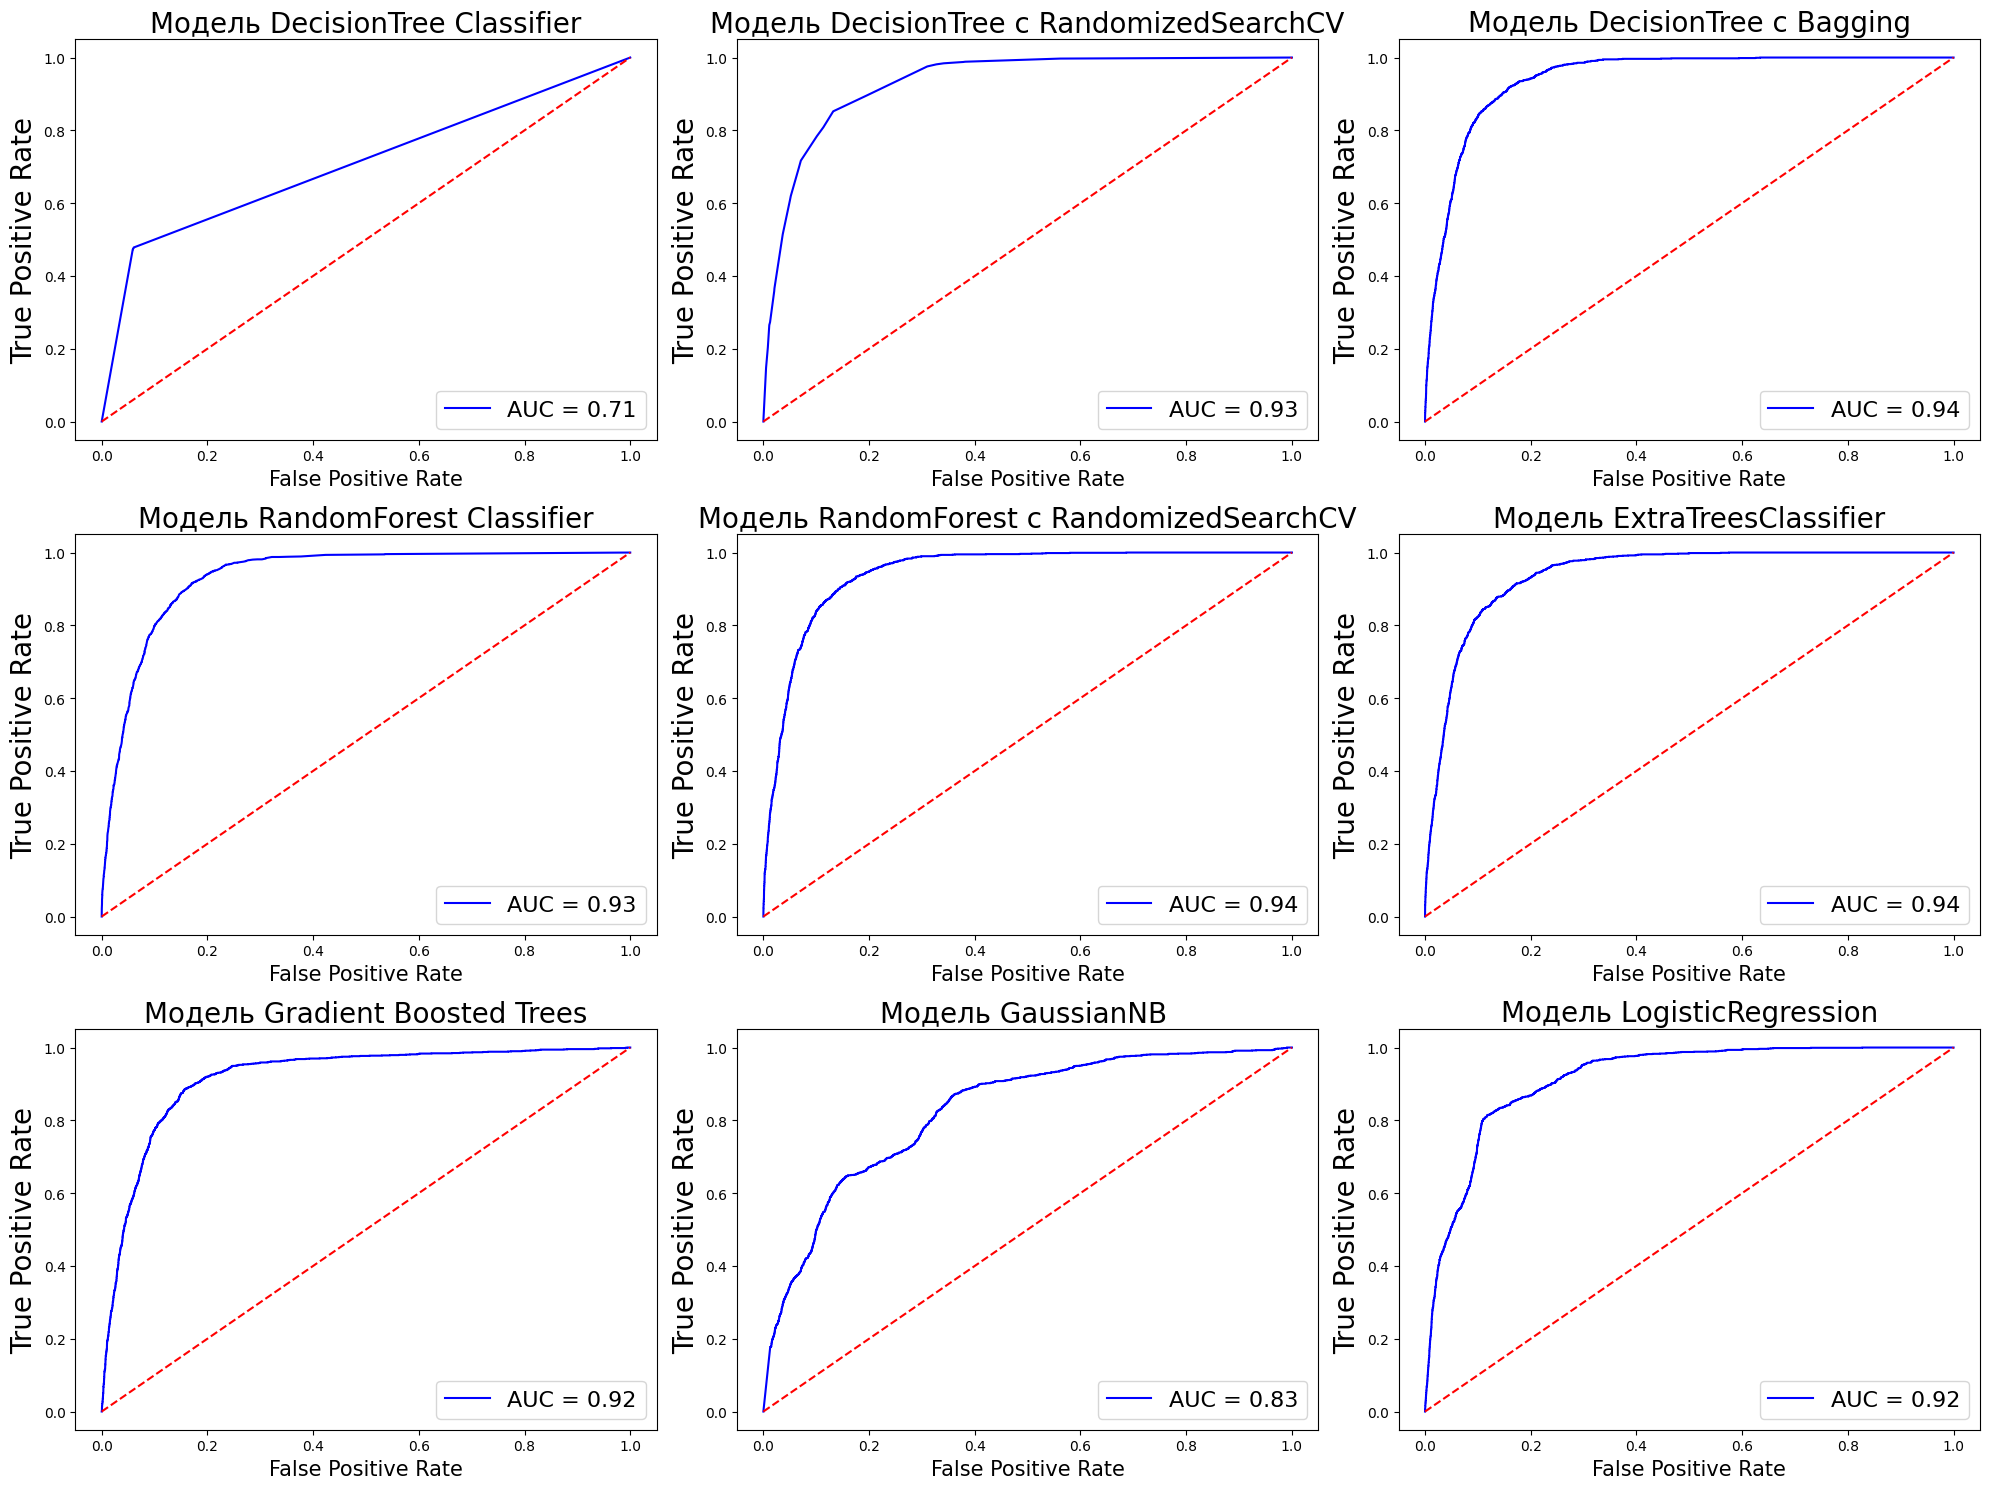

In [129]:
fig, ax_arr = plt.subplots(nrows = 3, ncols = 3, figsize = (20,15))


#DecisionTreeClassifier
probs = dtree_model.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[0,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Модель DecisionTree Classifier',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#DecisionTreeClassifierDrid
probs = best_model_tree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[0,1].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Модель DecisionTree с RandomizedSearchCV',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#BaggingClassifier
probs = model_bagging.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[0,2].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Модель DecisionTree c Bagging',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})


#RandomForest
probs = random_model_tree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Модель RandomForest Classifier',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})
#RandomForestRandomizedSearchCV

probs = random_model_tree_random.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,1].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Модель RandomForest с RandomizedSearchCV',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#ExtraTreesClassifier
probs = ext_model.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,2].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,2].plot([0, 1], [0, 1],'r--')
ax_arr[1,2].set_title('Модель ExtraTreesClassifier',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})


#Gradient Boosted Trees
probs = gb_clf.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[2,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[2,0].plot([0, 1], [0, 1],'r--')
ax_arr[2,0].set_title('Модель Gradient Boosted Trees',fontsize=20)
ax_arr[2,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[2,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[2,0].legend(loc = 'lower right', prop={'size': 16})
#GaussianNB
probs = gaussiannb.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[2,1].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[2,1].plot([0, 1], [0, 1],'r--')
ax_arr[2,1].set_title('Модель GaussianNB ',fontsize=20)
ax_arr[2,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[2,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[2,1].legend(loc = 'lower right', prop={'size': 16})


#LogisticRegression
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[2,2].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[2,2].plot([0, 1], [0, 1],'r--')
ax_arr[2,2].set_title('Модель LogisticRegression',fontsize=20)
ax_arr[2,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[2,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[2,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

ROC-кривая показывает зависимость между вероятностью ложных срабатываний и вероятностью правильных срабатываний при настройке параметров модели и выборе порогового значения для принятия решения. Чем больше площадь под ROC-кривой, тем более точным считается классификатор. Самый лучший показатель у RandomForest и ExtraTrees.

Рассмотрим нейронную сеть

ANN

In [12]:
%%time
standartScal = StandardScaler()

classifierANN = Sequential()

classifierANN.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = X_train.shape[1]))
classifierANN.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
classifierANN.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
classifierANN.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy', tf.keras.metrics.Recall()])

model_info=classifierANN.fit(standartScal.fit_transform(X_train), y_train,validation_split=0.33, batch_size = 20, epochs = 20)

Epoch 1/20
966/966 [==============================] - 5s 4ms/step - loss: 0.3642 - accuracy: 0.8705 - recall: 0.1085 - val_loss: 0.2876 - val_accuracy: 0.8944 - val_recall: 0.0964
Epoch 2/20
966/966 [==============================] - 3s 3ms/step - loss: 0.2701 - accuracy: 0.8938 - recall: 0.1267 - val_loss: 0.2530 - val_accuracy: 0.9006 - val_recall: 0.1947
Epoch 3/20
966/966 [==============================] - 3s 4ms/step - loss: 0.2449 - accuracy: 0.8982 - recall: 0.2056 - val_loss: 0.2369 - val_accuracy: 0.9025 - val_recall: 0.2609
Epoch 4/20
966/966 [==============================] - 4s 4ms/step - loss: 0.2320 - accuracy: 0.9008 - recall: 0.2621 - val_loss: 0.2280 - val_accuracy: 0.9038 - val_recall: 0.2769
Epoch 5/20
966/966 [==============================] - 4s 4ms/step - loss: 0.2246 - accuracy: 0.9019 - recall: 0.2867 - val_loss: 0.2227 - val_accuracy: 0.9051 - val_recall: 0.3242
Epoch 6/20
966/966 [==============================] - 2s 2ms/step - loss: 0.2196 - accuracy: 0.9027 

Точность хорошая, но recall не самый лучший.

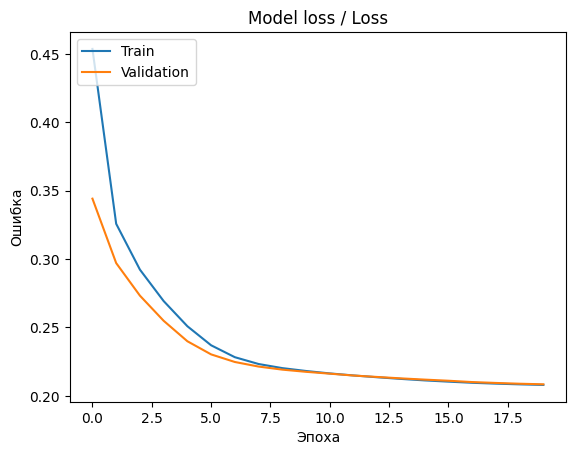

In [78]:
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('Model loss / Loss')
plt.ylabel('Ошибка')
plt.xlabel('Эпоха')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Рассмотрим модель с большим количеством нейронов, чтобы получить более мощную модель.

In [23]:
%%time
standartScal = StandardScaler()

classifierANN = Sequential()

classifierANN.add(Dense(units = 32, kernel_initializer = 'he_uniform',activation='relu',input_dim = X_train.shape[1]))
classifierANN.add(Dense(units = 32, kernel_initializer = 'he_uniform',activation='relu'))
classifierANN.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
classifierANN.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy', tf.keras.metrics.Recall()])

model_info=classifierANN.fit(standartScal.fit_transform(X_train), y_train,validation_split=0.33, batch_size = 20, epochs = 20)

Epoch 1/20
966/966 [==============================] - 2s 2ms/step - loss: 0.2980 - accuracy: 0.8868 - recall_5: 0.2088 - val_loss: 0.2437 - val_accuracy: 0.9032 - val_recall_5: 0.2665
Epoch 2/20
966/966 [==============================] - 2s 2ms/step - loss: 0.2341 - accuracy: 0.9008 - recall_5: 0.2922 - val_loss: 0.2245 - val_accuracy: 0.9036 - val_recall_5: 0.3185
Epoch 3/20
966/966 [==============================] - 2s 2ms/step - loss: 0.2209 - accuracy: 0.9023 - recall_5: 0.3464 - val_loss: 0.2172 - val_accuracy: 0.9038 - val_recall_5: 0.3582
Epoch 4/20
966/966 [==============================] - 2s 2ms/step - loss: 0.2147 - accuracy: 0.9034 - recall_5: 0.3696 - val_loss: 0.2144 - val_accuracy: 0.9060 - val_recall_5: 0.3658
Epoch 5/20
966/966 [==============================] - 2s 2ms/step - loss: 0.2113 - accuracy: 0.9047 - recall_5: 0.3915 - val_loss: 0.2122 - val_accuracy: 0.9063 - val_recall_5: 0.4130
Epoch 6/20
966/966 [==============================] - 2s 2ms/step - loss: 0.2091

Модель показывает лучшую точность, но видно, что она не учитывает несбалансированность классов.

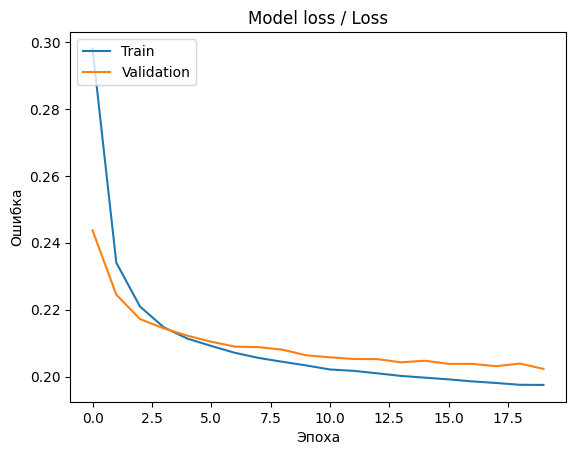

In [24]:
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('Model loss / Loss')
plt.ylabel('Ошибка')
plt.xlabel('Эпоха')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Заключение 

При помощи многообразия библиотек языка программирования Python было продемонстрировано решение задачи классификации на датасете Bank Marketing Data Set, который выявляет будет ли клиент банка подписываться на новый продукт (депозит) или нет, основываясь на информации о клиенте, такой как возраст, образование, семейный статус, работа и т.д. С помощью модели лесов деревьев решений можно достигнуть высокой точности. Было проанализировано несколько моделей деревьев решений DecisionTree совместно с моделями лесов деревьев решений, таких как RandomForest,Gradient Boosted Trees, ExtraTreesClassifier с разными гиперпараметрами, чтобы выявить лучшую модель. Затем леса деревьев решений сравнивалась с моделями GaussianNB и LogisticRegression, а также с нейроными сетями. 

Леса деревьев решений являются хорошим, мощным инструментом при работе с большими данными. Можно отметить, леса дереьев решений помогают справиться с несбалансированными классами. Самыми эффективными метриками показали себя RandomForest, Bagging, RandomForest с подбором гиперпараметров, а также ExtraTrees. 
